<a href="https://colab.research.google.com/github/lhayana/python-imd-project/blob/master/Politics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
#importando csv
news = pd.read_csv("/content/brazil-2018.csv", sep=';', header=[0]) 
#lendo as 10 primeiras linhas
news.head(10)

,id,texto,rotulo,fonte
0,1,"Salário Mínimo: R$ 950,00. Bolsa Presidiário: ...",FALSO,AOS FATOS
1,2,Empresa contratada pelo TSE para apuração dos ...,FALSO,AOS FATOS
2,3,"O Aloizio Mercadante, ministro da Educação, mo...",FALSO,AOS FATOS
3,4,Há um complô espalhando fake news descaradas e...,FALSO,AOS FATOS
4,5,"Somente em 2017, mais de 800 milhões de tonela...",VERDADE,AOS FATOS
5,6,Nunca vi o Lula pronunciar essa palavra fascis...,FALSO,AOS FATOS
6,7,"O Mourão, por exemplo, foi ele próprio tortura...",FALSO,AOS FATOS
7,8,"O PSB, todos os seus governadores e o seu pres...",FALSO,AOS FATOS
8,9,Bolsonaro Nunca aprovou um projeto de seguranç...,VERDADE,AOS FATOS
9,10,Ele Lula não pode aparecer mais que 25% no hor...,VERDADE,AOS FATOS


In [6]:
#O texto do boato está com um traço (-) seguido do nome do candidato, então foi feita a separação
news[["texto", "candidatos"]] = news["texto"].str.split(" - ", expand=True)
#Mas vale lembrar que nem todos os boatos estão atribuídos a algum candidato

#"Limpando" os dados, substituindo quando há nomes diferentes para o mesmo candidato
news['candidatos'] = news['candidatos'].replace(['Jair Bolsonaro'], 'Jair Bolsonaro (PSL)')
news['candidatos'] = news['candidatos'].replace(['Fernando Haddad.', 'Fernando Haddad', 'Fernando Haddad '], 'Fernando Haddad (PT)')
news['candidatos'] = news['candidatos'].replace(['Alvaro Dias (PODEMOS)', 'Alvaro Dias'], 'Alvaro Dias (Podemos)')
news['candidatos'] = news['candidatos'].replace(['Marina Silva', 'Marina Rede (Rede)'], 'Marina Silva (Rede)')
news['candidatos'] = news['candidatos'].replace(['Henrique Meirelles', 'Henrique Meireles (MDB)'], 'Henrique Meirelles (MDB)')

#Selecionando apenas as fake news
fakes = news.loc[news['rotulo'] == 'FALSO']

#retirando aqueles que, no fim, não foram candidatos à presidência
fakes = fakes.loc[fakes['candidatos'] != 'Jean Wyllys'] 
fakes = fakes.loc[fakes['candidatos'] != 'Manuela D’Ávila']
print(fakes)

      id  ...            candidatos
0      1  ...                  None
1      2  ...                  None
2      3  ...  Jair Bolsonaro (PSL)
3      4  ...  Jair Bolsonaro (PSL)
5      6  ...  Fernando Haddad (PT)
..   ...  ...                   ...
453  454  ...                  None
454  455  ...                  None
455  456  ...                  None
457  458  ...  Jair Bolsonaro (PSL)
458  459  ...  Jair Bolsonaro (PSL)

[237 rows x 5 columns]


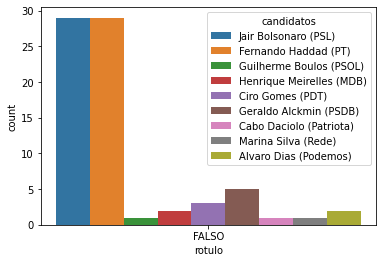

In [8]:
#plotando um gráfico de barras com o pacote seaborn

sns.countplot(hue='candidatos', x="rotulo" , data = fakes)